In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy import interpolate, stats
from scipy.optimize import curve_fit, bisect
from decimal import Decimal
from re import sub
from math import ceil

In [2]:
money2dec = lambda money: Decimal(sub(r'[^\d\-.]', '', money))

In [25]:
df = pd.read_csv('~/Documents/finances/trends.csv', index_col='Dates', parse_dates=True) #.reset_index(drop=True)
df = df.tail(12)  # last 12 months
df = df.applymap(money2dec)

In [26]:
# delta_df = pd.DataFrame(np.zeros()

df['delta_Assets'] = df.Assets.diff().fillna(0).astype(float)
df['delta_Debt'] = df.Debts.diff().fillna(0).astype(float)
df['delta_Net'] = df.Net.diff().fillna(0).astype(float)

df

,Assets,Debts,Net,delta_Assets,delta_Debt,delta_Net
Dates,,,,,,
2016-05-01,28196.94,-11358.52,16838.42,0.00,0.00,0.00
2016-06-01,30734.16,-10888.89,19845.27,2537.22,469.63,3006.85
2016-07-01,33590.57,-11392.73,22197.84,2856.41,-503.84,2352.57
2016-08-01,34390.77,-8857.53,25533.24,800.20,2535.20,3335.40
2016-09-01,36738.09,-9192.54,27545.55,2347.32,-335.01,2012.31
2016-10-01,38124.34,-9738.46,28385.88,1386.25,-545.92,840.33
2016-11-01,38468.98,-8350.03,30118.95,344.64,1388.43,1733.07
2016-12-01,41227.77,-7326.55,33901.22,2758.79,1023.48,3782.27
2017-01-01,43813.00,-4976.50,38836.50,2585.23,2350.05,4935.28


<IPython.core.display.Javascript object>


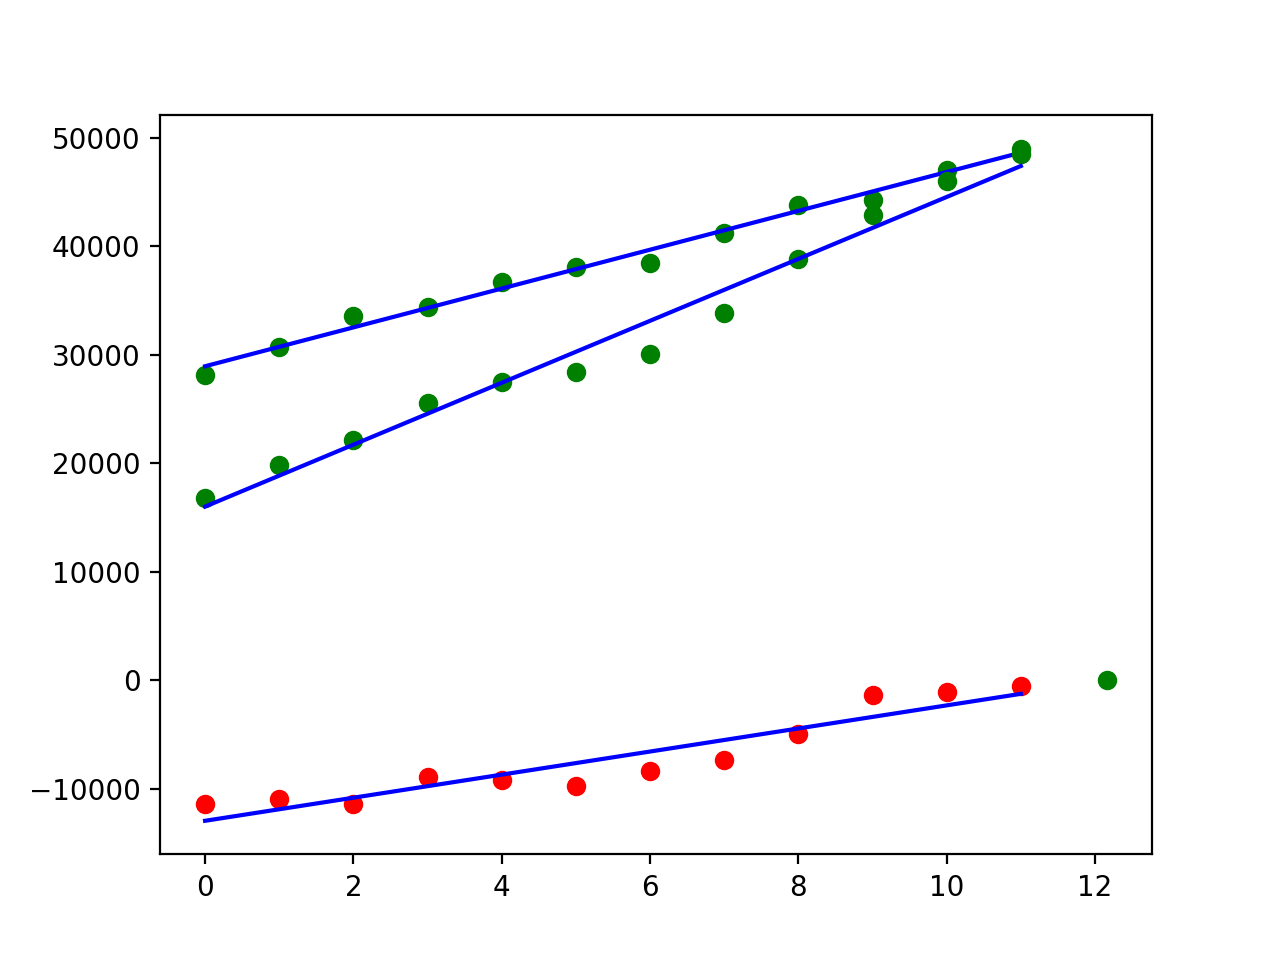

Assets slope $1790.08
Debts slope $1063.92
Net slope $2854.00


In [27]:
def linear_func(x, m, b):
    return m*x + b

xi = range(len(df))
keys = [ 'Assets', 'Debts', 'Net' ]
slopes = {k: 0 for k in keys}
for k in keys:
    y = df[k].values

    slope, intercept, r_value, p_value, std_err = stats.linregress(xi,y.astype(float))
    slopes[k] = slope
    
    line = linear_func(xi, slope, intercept)

    if k == 'Debts':
        root = -intercept / slope
        plt.plot(xi,y, 'ro', xi, line, 'b-', root, linear_func(root, slope, intercept), 'go')
    else:
        plt.plot(xi,y, 'go', xi, line, 'b-')
        
for k,slope in slopes.items():
    print("{} slope ${:.02f}".format(k, slope))


In [15]:
step = 1/10
interp_kind = ['linear', 'cubic'][0]
extrap_months = ceil(root) - 10

_fill = "extrapolate" 
if interp_kind != "linear": 
    _fill = np.nan
    extrap_months = 0 

for k in keys:
    y = df[k].values
    months = (len(y) - 1) + extrap_months
    # print(_fill, months)
    f = interpolate.interp1d(xi, y, kind=interp_kind, fill_value=_fill)

    x_new = np.arange(0, months, step)
    plt.plot(xi, y, 'o', x_new, f(x_new))

#     if k == 'Net':
#         slope, intercept, r_value, p_value, std_err = stats.linregress(x_new,y)
#         line = net_slope*x_new+intercept
#         plt.plot(x_new,y,'o', x_new, line)
    

#### 